# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Rafli Dwi Sutrisno
- **Email:** rfldx30@gmail.com
- **ID Dicoding:** mraflidwis

## Menentukan Pertanyaan Bisnis

* Bagaimana Performa Penyewaan Sepeda Dalam Setahun Terakhir?
- Bagaimana Pola / Ciri Khas dari Rata-Rata Penyewa Sepeda untuk Masing-Masing Hari ?
* Bagaimana Pola / Ciri Khas dari Rata-Rata Penyewa Sepeda untuk Masing-Masing Season ?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
* Gather kedua Data

In [2]:
hour_df = pd.read_csv("C:/Users/MSI BRAVO/proyek_analisis_data/submission/data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
day_df = pd.read_csv("C:/Users/MSI BRAVO/proyek_analisis_data/submission/data/day.csv")
day_df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Assessing Hour Dataframe
##### Assessing meliputi :
1. Pengecekan missing value, duplicate value
2. Pengecekan type variable / column
3. Pengecekan general dengan describe / info

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* Data Season, Year, Month, Hour, Holiday, Weekday, Workingday, Weathersit seharusnya merupakan data object atau kategorik. Sehingga, perlu dilakukan tindakan lebih lanjut pada Cleaning Data

* Data dteday / Date mempunyai type object, perlu dilakukan tindakan lanjut pada Cleaning Data

In [5]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
print("Jumlah data N/A : ")
hour_df.isna().sum()

Jumlah data N/A : 


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Assessing Day Dataframe

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# Data Season, Year, Month,Holiday, Weekday, Workingday, Weathersit seharusnya merupakan data object atau kategorik.
# Sehingga, perlu dilakukan tindakan lebih lanjut pada Cleaning Data

#Data dteday / Date mempunyai type object, perlu dilakukan tindakan lanjut pada Cleaning Data

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
print("Jumlah data N/A : ")
day_df.isna().sum()

Jumlah data N/A : 


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

#### Ubah Type Hour Dataframe

In [15]:
kolom_kategorik = ["season", "yr","hr","mnth", "holiday", "weekday", "workingday", "weathersit"]

for kolom in kolom_kategorik:
    hour_df[kolom] = hour_df[kolom].astype("category")
else:
    None

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [17]:
kolom_kategorik = ["season", "yr","mnth", "holiday", "weekday", "workingday", "weathersit"]

for kolom in kolom_kategorik:
    day_df[kolom] = day_df[kolom].astype("category")
else:
    None

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB


#### Ubah Type Date dari Object ke DateTime

In [19]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [20]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [22]:
hour_df.resample(rule='D', on='dteday').agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,
2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
2012-12-27,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [23]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Dari kedua data tersebut dapat disimpulkan jika sebenarnya kedua data tersebut adalah data yang sama, bukan berarti data hourly dan data daily ini merupakan produk penyewaan sepeda yang berbeda namun hanya pengambilan data saja yang berbeda. Maka saya cenderung untuk menggunakan salah satu data saja yang dilakukan Exploratory Data Analysis. Saya akan memakai data Day karena hal ini lebih efektif dan menghindari adanya bias dikarenakan adanya Oversize Data yang ada pada data Hour

* contoh bias yang dapat terjadi, jika kita melakukan uji distribusi secara singkat kepada kedua data

<AxesSubplot:>

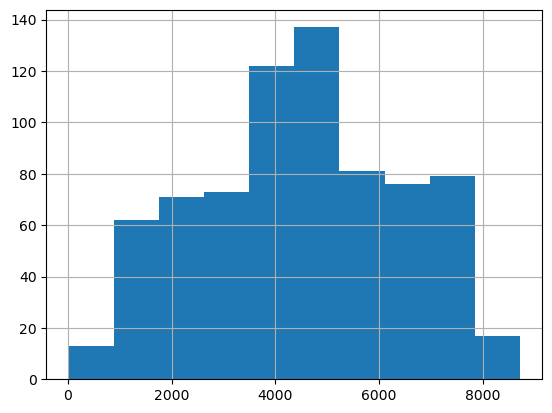

In [24]:
day_df.cnt.hist()

<AxesSubplot:>

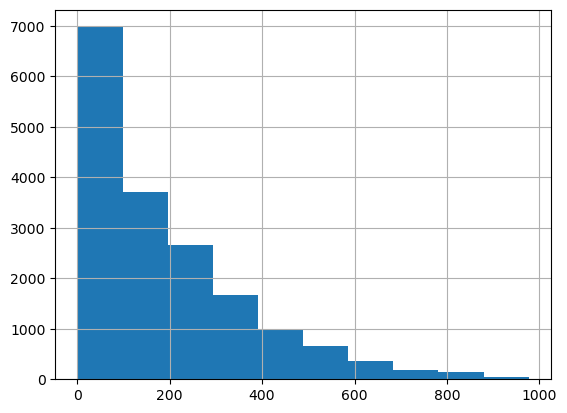

In [25]:
hour_df.cnt.hist()

*Apabila kita menggunakan Data Day, terlihat bahwa data tersebut mendekati distribusi atau bahkan berdistribusi normal jika kita nilai secara visual dari histogram

---
## Exploratory Data Analysis (EDA)

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Hari
* 0 : Sunday - 6 : Saturday

In [26]:
day_df.groupby("weekday").agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [27]:
day_df.groupby("weekday").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

,casual,registered,cnt
weekday,,,
0,1338.0,2891.0,4229.0
1,674.0,3664.0,4338.0
2,556.0,3954.0,4511.0
3,551.0,3997.0,4549.0
4,591.0,4076.0,4667.0
5,752.0,3938.0,4690.0
6,1465.0,3085.0,4551.0


* Kesimpulan secara singkat : Jumlah keseluruhan dan Rata-rata Total Renter (cnt) terbesar berada pada hari Kamis

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Weathersit
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [28]:
day_df.groupby("weathersit").agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


* Didapatkan informasi apabila gap tersebut terlalu tinggi, maka harus diperlukan pengecekan size untuk masing-masing weather

In [29]:
day_df.groupby("weathersit").size()

weathersit
1    463
2    247
3     21
dtype: int64

* Terbukti apabila memang adanya perbedaan signifikan disini, maka pengukuran yang dapat kita pakai adalah rata-rata, maka untuk selanjutnya apabila memang data tersebut mempunyai perbedaan size yang tinggi maka akan dilakukan eksplorasi rata-rata saja

In [30]:
day_df.groupby("weathersit").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

,casual,registered,cnt
weathersit,,,
1,964.0,3913.0,4877.0
2,687.0,3349.0,4036.0
3,185.0,1618.0,1803.0


* Kesimpulan secara singkat : Rata-rata Total Renter (cnt) terbesar berada pada weathersit 1 :  Clear, Few clouds, Partly cloudy, Partly cloudy

### Explore Rata-Rata Renter Berdasarkan Workingday
* 1 : Monday - Friday
* 0 : Saturday - Sunday

In [31]:
day_df.groupby("workingday").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

,casual,registered,cnt
workingday,,,
0,1371.0,2959.0,4330.0
1,607.0,3978.0,4585.0


* Kesimpulan secara singkat : Rata-rata Total Renter (cnt) terbesar berada pada Working Day yaitu Monday ~ Friday

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Season
* (1:springer, 2:summer, 3:fall, 4:winter)

In [32]:
day_df.groupby("season").agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [33]:
day_df.groupby("season").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

,casual,registered,cnt
season,,,
1,335.0,2269.0,2604.0
2,1106.0,3886.0,4992.0
3,1203.0,4442.0,5644.0
4,729.0,3999.0,4728.0


* Kesimpulan secara singkat : Rata-rata dan Jumlah Total Renter (cnt) terbesar berada pada Season 3 : Fall

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Month
* (1 to 12)

In [34]:
day_df.groupby("mnth").agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


In [35]:
day_df.groupby("mnth").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

,casual,registered,cnt
mnth,,,
1,194.0,1982.0,2176.0
2,263.0,2393.0,2655.0
3,717.0,2975.0,3692.0
4,1013.0,3472.0,4485.0
5,1214.0,4136.0,5350.0
6,1232.0,4541.0,5772.0
7,1261.0,4303.0,5564.0
8,1162.0,4502.0,5664.0
9,1172.0,4594.0,5767.0


In [36]:
day_df.groupby("mnth").agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
}).sort_values(by="cnt",ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


In [37]:
day_df.groupby("mnth").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0).sort_values(by="cnt",ascending=False)

,casual,registered,cnt
mnth,,,
6,1232.0,4541.0,5772.0
9,1172.0,4594.0,5767.0
8,1162.0,4502.0,5664.0
7,1261.0,4303.0,5564.0
5,1214.0,4136.0,5350.0
10,964.0,4235.0,5199.0
4,1013.0,3472.0,4485.0
11,610.0,3637.0,4247.0
3,717.0,2975.0,3692.0


* Kesimpulan secara singkat : Rata-rata Total Renter (cnt) terbesar berada pada Bulan Juni, sedangkan Jumlah Total Renter (cnt) terbesar berada pada Bulan Agustus

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Year
* (0: 2011, 1:2012)

In [38]:
day_df.groupby("yr").agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


In [39]:
day_df.groupby("yr").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

,casual,registered,cnt
yr,,,
0,677.0,2728.0,3406.0
1,1018.0,4581.0,5600.0


* Kesimpulan secara singkat : Jumlah dan Rata-rata Total Renter (cnt) terbesar berada pada tahun 2012, hal ini menunjukkan adanya kenaikan dari tahun 2011 yaitu tahun sebelumnya

### Explore Rata-Rata Renter Berdasarkan Workingday in Every Month
* 1 : Monday - Friday
* 0 : Saturday - Sunday

In [40]:
day_df.groupby(by=["mnth", "workingday"]).agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

casual  registered     cnt
mnth workingday                            
1    0            305.0      1559.0  1864.0
     1            133.0      2215.0  2348.0
2    0            443.0      1798.0  2242.0
     1            179.0      2667.0  2846.0
3    0           1230.0      2409.0  3639.0
     1            523.0      3189.0  3713.0
4    0           1638.0      2825.0  4463.0
     1            701.0      3795.0  4496.0
5    0           2137.0      3434.0  5571.0
     1            806.0      4446.0  5252.0
6    0           2140.0      4014.0  6154.0
     1            873.0      4749.0  5622.0
7    0           1901.0      3504.0  5406.0
     1            932.0      4712.0  5645.0
8    0           1643.0      3320.0  4963.0
     1            994.0      4914.0  5908.0
9    0           2057.0      4061.0  6118.0
     1            730.0      4861.0  5591.0
10   0           1627.0      3483.0  5111.0
     1            648.0      4593.0  5241.0
11   0           1046.0      2998.0  4044.0
     1            392.0      3957.0  4349.0
12   0            504.0      2303.0  2807.0
     1            271.0      3439.0  3710.0

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Weekday in Every Month
* 0 : Sunday - 6 : Saturday

In [41]:
day_df.groupby(by=["mnth", "weekday"]).agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

casual  registered    cnt
mnth weekday                           
1    0          3049       15110  18159
     1          1244       18024  19268
     2          1498       21612  23110
     3           982       16127  17109
     4          1007       19099  20106
...              ...         ...    ...
12   2          2306       27400  29706
     3          1573       24590  26163
     4          2320       31078  33398
     5          3004       30678  33682
     6          5538       26411  31949

[84 rows x 3 columns]

In [42]:
day_df.groupby(by=["mnth", "weekday"]).agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

casual  registered     cnt
mnth weekday                            
1    0         305.0      1511.0  1816.0
     1         124.0      1802.0  1927.0
     2         166.0      2401.0  2568.0
     3         123.0      2016.0  2139.0
     4         126.0      2387.0  2513.0
...              ...         ...     ...
12   2         288.0      3425.0  3713.0
     3         197.0      3074.0  3270.0
     4         258.0      3453.0  3711.0
     5         334.0      3409.0  3742.0
     6         554.0      2641.0  3195.0

[84 rows x 3 columns]

### Berikut adalah hasil eksplorasi yang kurang sempurna, karena terdapat beberapa missing value

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Weathersit in Every Month
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [43]:
day_df.groupby(by=["mnth", "weathersit"]).agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

casual  registered     cnt
mnth weathersit                            
1    1             8787       78604   87391
     2             3221       43815   47036
     3               34         472     506
2    1            11549       93499  105048
     2             3222       40913   44135
     3              192        1977    2169
3    1            23981      116008  139989
     2            20238       66385   86623
     3              225        2083    2308
4    1            45606      151543  197149
     2            14955       55168   70123
     3              241        1581    1822
5    1            53481      157357  210838
     2            21804       99044  120848
     3                0           0       0
6    1            62240      216590  278830
     2            11666       55846   67512
     3                0           0       0
7    1            61113      220253  281366
     2            15780       43343   59123
     3             1264        3195    4459
8    1            49667      201254  250921
     2            22372       77901  100273
     3                0           0       0
9    1            46952      175248  222200
     2            22896       94347  117243
     3              475        6073    6548
10   1            40903      146594  187497
     2            18012      106715  124727
     3              845        9283   10128
11   1            30352      154273  184625
     2             5817       58200   64017
     3              434        5755    6189
12   1            11715      100383  112098
     2             9793       85405   95198
     3              185        3555    3740

In [44]:
day_df.groupby(by=["mnth", "weathersit"]).agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

casual  registered     cnt
mnth weathersit                            
1    1            237.0      2124.0  2362.0
     2            134.0      1826.0  1960.0
     3             34.0       472.0   506.0
2    1            312.0      2527.0  2839.0
     2            170.0      2153.0  2323.0
     3            192.0      1977.0  2169.0
3    1            666.0      3222.0  3889.0
     2            843.0      2766.0  3609.0
     3            112.0      1042.0  1154.0
4    1           1233.0      4096.0  5328.0
     2            712.0      2627.0  3339.0
     3            120.0       790.0   911.0
5    1           1445.0      4253.0  5698.0
     2            872.0      3962.0  4834.0
     3              NaN         NaN     NaN
6    1           1353.0      4708.0  6062.0
     2            833.0      3989.0  4822.0
     3              NaN         NaN     NaN
7    1           1198.0      4319.0  5517.0
     2           1578.0      4334.0  5912.0
     3           1264.0      3195.0  4459.0
8    1           1155.0      4680.0  5835.0
     2           1177.0      4100.0  5278.0
     3              NaN         NaN     NaN
9    1           1423.0      5311.0  6733.0
     2            954.0      3931.0  4885.0
     3            158.0      2024.0  2183.0
10   1           1278.0      4581.0  5859.0
     2            720.0      4269.0  4989.0
     3            169.0      1857.0  2026.0
11   1            723.0      3673.0  4396.0
     2            388.0      3880.0  4268.0
     3            145.0      1918.0  2063.0
12   1            366.0      3137.0  3503.0
     2            363.0      3163.0  3526.0
     3             62.0      1185.0  1247.0

### Explore Jumlah dan Rata-Rata Renter Berdasarkan Season in Every Month
* (1:springer, 2:summer, 3:fall, 4:winter)

In [45]:
day_df.groupby(by=["mnth", "season"]).agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum", 
})

casual  registered     cnt
mnth season                            
1    1        12042      122891  134933
     2            0           0       0
     3            0           0       0
     4            0           0       0
2    1        14963      136389  151352
     2            0           0       0
     3            0           0       0
     4            0           0       0
3    1        27154      114911  142065
     2        17290       69565   86855
     3            0           0       0
     4            0           0       0
4    1            0           0       0
     2        60802      208292  269094
     3            0           0       0
     4            0           0       0
5    1            0           0       0
     2        75285      256401  331686
     3            0           0       0
     4            0           0       0
6    1            0           0       0
     2        50145      180809  230954
     3        23761       91627  115388
     4            0           0       0
7    1            0           0       0
     2            0           0       0
     3        78157      266791  344948
     4            0           0       0
8    1            0           0       0
     2            0           0       0
     3        72039      279155  351194
     4            0           0       0
9    1            0           0       0
     2            0           0       0
     3        52134      197465  249599
     4        18189       78203   96392
10   1            0           0       0
     2            0           0       0
     3            0           0       0
     4        59760      262592  322352
11   1            0           0       0
     2            0           0       0
     3            0           0       0
     4        36603      218228  254831
12   1         6463       36535   42998
     2            0           0       0
     3            0           0       0
     4        15230      152808  168038

In [46]:
day_df.groupby(by=["mnth", "season"]).agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)

casual  registered     cnt
mnth season                            
1    1        194.0      1982.0  2176.0
     2          NaN         NaN     NaN
     3          NaN         NaN     NaN
     4          NaN         NaN     NaN
2    1        263.0      2393.0  2655.0
     2          NaN         NaN     NaN
     3          NaN         NaN     NaN
     4          NaN         NaN     NaN
3    1        679.0      2873.0  3552.0
     2        786.0      3162.0  3948.0
     3          NaN         NaN     NaN
     4          NaN         NaN     NaN
4    1          NaN         NaN     NaN
     2       1013.0      3472.0  4485.0
     3          NaN         NaN     NaN
     4          NaN         NaN     NaN
5    1          NaN         NaN     NaN
     2       1214.0      4136.0  5350.0
     3          NaN         NaN     NaN
     4          NaN         NaN     NaN
6    1          NaN         NaN     NaN
     2       1254.0      4520.0  5774.0
     3       1188.0      4581.0  5769.0
     4          NaN         NaN     NaN
7    1          NaN         NaN     NaN
     2          NaN         NaN     NaN
     3       1261.0      4303.0  5564.0
     4          NaN         NaN     NaN
8    1          NaN         NaN     NaN
     2          NaN         NaN     NaN
     3       1162.0      4502.0  5664.0
     4          NaN         NaN     NaN
9    1          NaN         NaN     NaN
     2          NaN         NaN     NaN
     3       1185.0      4488.0  5673.0
     4       1137.0      4888.0  6024.0
10   1          NaN         NaN     NaN
     2          NaN         NaN     NaN
     3          NaN         NaN     NaN
     4        964.0      4235.0  5199.0
11   1          NaN         NaN     NaN
     2          NaN         NaN     NaN
     3          NaN         NaN     NaN
     4        610.0      3637.0  4247.0
12   1        294.0      1661.0  1954.0
     2          NaN         NaN     NaN
     3          NaN         NaN     NaN
     4        381.0      3820.0  4201.0

### Eksplorasi Correlation dan Covariance Variable pada Data

In [47]:
corr_day_df = day_df.drop(columns=['instant', 'dteday'])
corr_day_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [48]:
cov_day_df = corr_day_df
cov_day_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [49]:
corr_day_df.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [50]:
cov_day_df.cov()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,0.033508,0.029583,0.003310,-0.002241,68.283781,1.542309e+02,2.225147e+02
atemp,0.029583,0.026556,0.003249,-0.002319,60.854436,1.383669e+02,1.992213e+02
hum,0.003310,0.003249,0.020286,-0.002743,-7.530987,-2.024225e+01,-2.777323e+01
windspeed,-0.002241,-0.002319,-0.002743,0.006006,-8.919005,-2.629318e+01,-3.521218e+01
casual,68.283781,60.854436,-7.530987,-8.919005,471450.441418,4.234689e+05,8.949193e+05
registered,154.230919,138.366859,-20.242247,-26.293180,423468.902417,2.434400e+06,2.857869e+06
cnt,222.514700,199.221295,-27.773235,-35.212185,894919.343836,2.857869e+06,3.752788e+06


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam setahun terakhir?


In [51]:
monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_rent_df

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821
2011-06-30,30612,112900,143512
2011-07-31,36452,104889,141341
2011-08-31,28842,107849,136691
2011-09-30,26545,100873,127418


In [52]:
monthly_rent_df.index = monthly_rent_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_rent_df = monthly_rent_df.reset_index()
monthly_rent_df.rename(columns={
    "casual": "casual_user",
    "registered": "registered_user",
    "cnt": "total_user",
}, inplace=True)
monthly_rent_df

,dteday,casual_user,registered_user,total_user
0,January,3073,35116,38189
1,February,6242,41973,48215
2,March,12826,51219,64045
3,April,22346,72524,94870
4,May,31050,104771,135821
5,June,30612,112900,143512
6,July,36452,104889,141341
7,August,28842,107849,136691
8,September,26545,100873,127418
9,October,25222,98289,123511


In [53]:
monthly_rent_df.rename(columns={
    "dteday": "month",
}, inplace=True)

In [54]:
monthly_rent_df_2012 = monthly_rent_df[12:]
monthly_rent_df_2012

,month,casual_user,registered_user,total_user
12,January,8969,87775,96744
13,February,8721,94416,103137
14,March,31618,133257,164875
15,April,38456,135768,174224
16,May,44235,151630,195865
17,June,43294,159536,202830
18,July,41705,161902,203607
19,August,43197,171306,214503
20,September,43778,174795,218573
21,October,34538,164303,198841


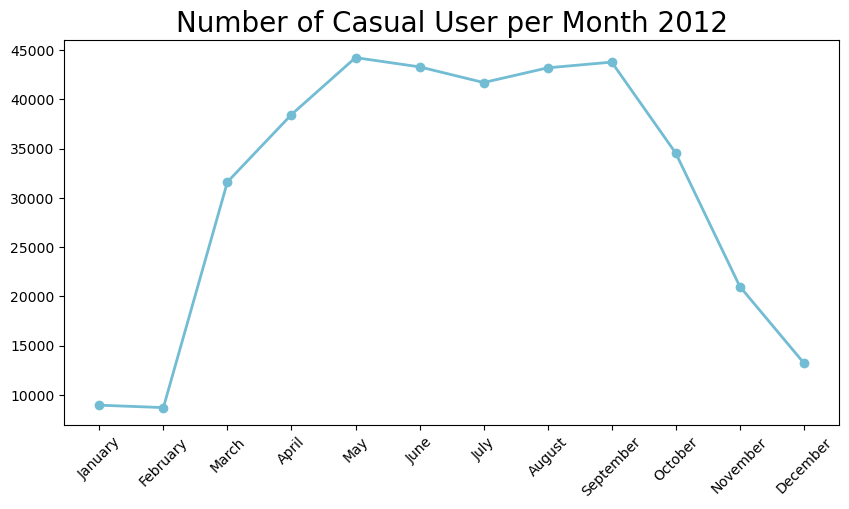

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_rent_df_2012["month"],
    monthly_rent_df_2012["casual_user"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Casual User per Month 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

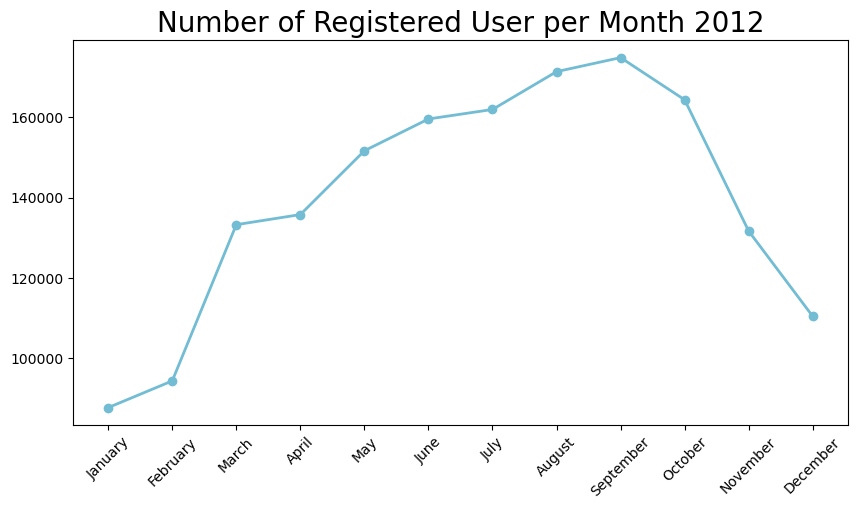

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_rent_df_2012["month"],
    monthly_rent_df_2012["registered_user"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Registered User per Month 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

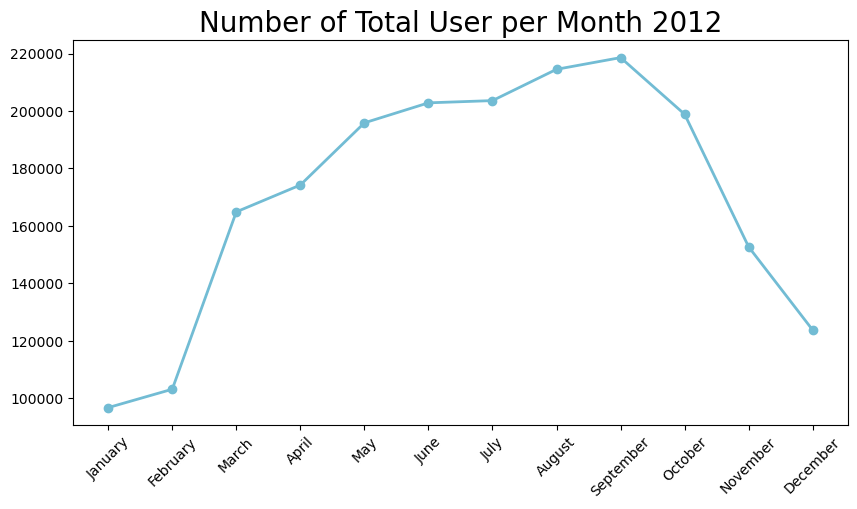

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_rent_df_2012["month"],
    monthly_rent_df_2012["total_user"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Total User per Month 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

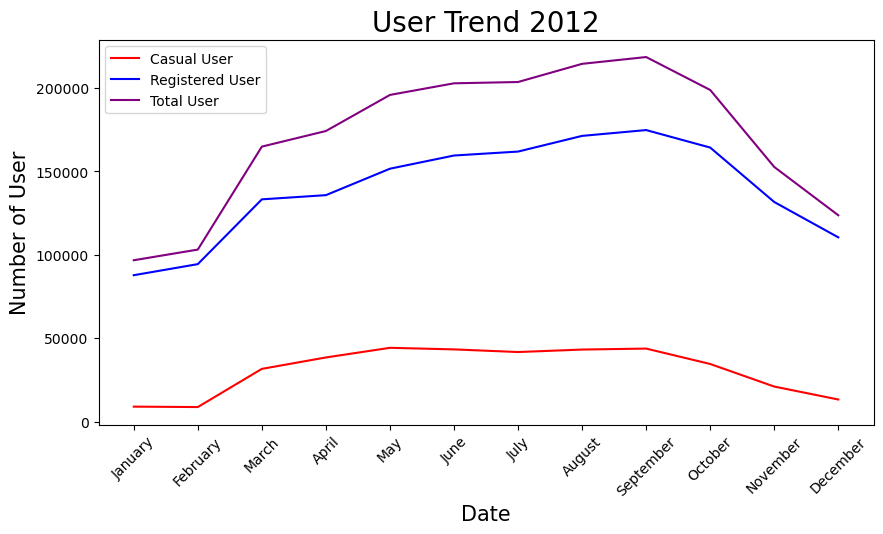

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_rent_df_2012['month'], monthly_rent_df_2012['casual_user'], label='Casual User', color='red')
plt.plot(monthly_rent_df_2012['month'], monthly_rent_df_2012['registered_user'], label='Registered User', color='blue')
plt.plot(monthly_rent_df_2012['month'], monthly_rent_df_2012['total_user'], label='Total User', color='purple')
plt.title('User Trend 2012', size=20)
plt.xlabel('Date',size=15)
plt.xticks(fontsize=10,rotation=45)
plt.ylabel('Number of User',size=15)
plt.legend()
plt.show()

### Pertanyaan 2 : Bagaimana Pola / Ciri Khas dari Rata-Rata Penyewa Sepeda untuk Masing-Masing Hari ?

In [59]:
everyday_df = day_df.groupby("weekday").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)
everyday_df

,casual,registered,cnt
weekday,,,
0,1338.0,2891.0,4229.0
1,674.0,3664.0,4338.0
2,556.0,3954.0,4511.0
3,551.0,3997.0,4549.0
4,591.0,4076.0,4667.0
5,752.0,3938.0,4690.0
6,1465.0,3085.0,4551.0


In [60]:
everyday_df = everyday_df.reset_index()
everyday_df.rename(columns={
    "cnt": "total",
    "weekday" : "day"
}, inplace=True)
everyday_df

,day,casual,registered,total
0,0,1338.0,2891.0,4229.0
1,1,674.0,3664.0,4338.0
2,2,556.0,3954.0,4511.0
3,3,551.0,3997.0,4549.0
4,4,591.0,4076.0,4667.0
5,5,752.0,3938.0,4690.0
6,6,1465.0,3085.0,4551.0


In [61]:
hari_dict = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

In [62]:
everyday_df["day"] = everyday_df["day"].replace(hari_dict)


In [63]:
everyday_df

,day,casual,registered,total
0,Sunday,1338.0,2891.0,4229.0
1,Monday,674.0,3664.0,4338.0
2,Tuesday,556.0,3954.0,4511.0
3,Wednesday,551.0,3997.0,4549.0
4,Thursday,591.0,4076.0,4667.0
5,Friday,752.0,3938.0,4690.0
6,Saturday,1465.0,3085.0,4551.0


In [64]:
everyday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         7 non-null      category
 1   casual      7 non-null      float64 
 2   registered  7 non-null      float64 
 3   total       7 non-null      float64 
dtypes: category(1), float64(3)
memory usage: 659.0 bytes


In [65]:
everyday_df['day']=everyday_df['day'].astype(str)

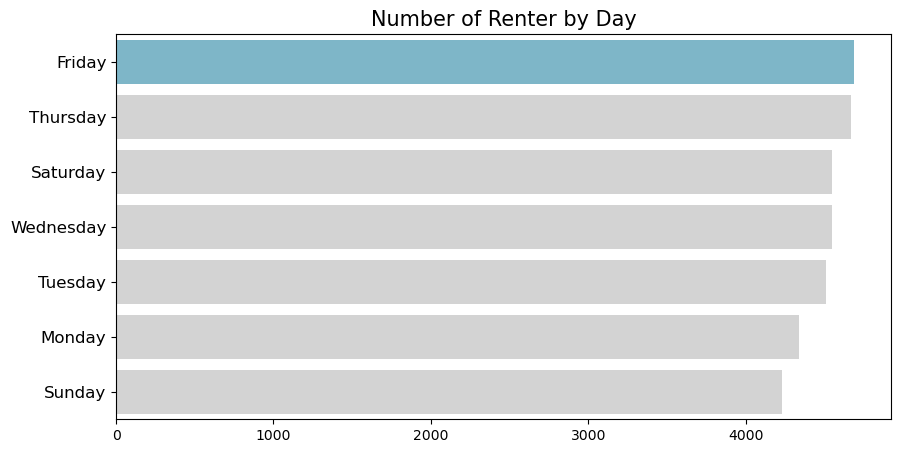

In [66]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="total", 
    y="day",
    data=everyday_df.sort_values(by="total", ascending=False),
    palette=colors_
)
plt.title("Number of Renter by Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

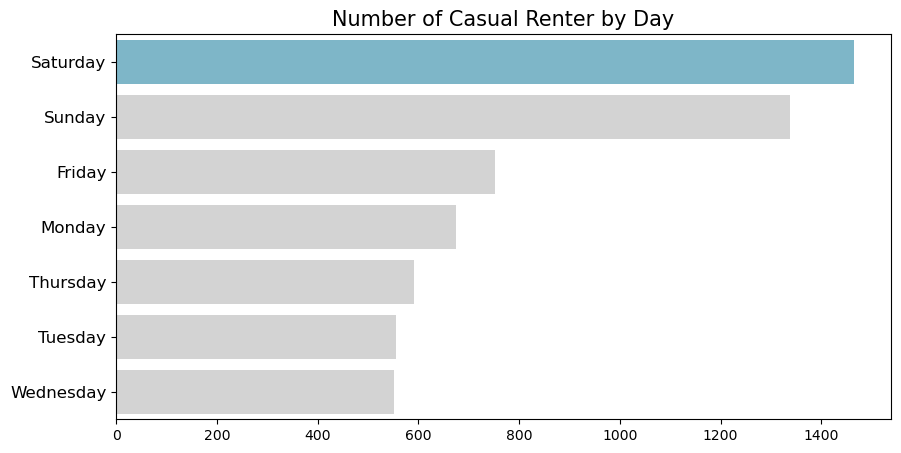

In [67]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="casual", 
    y="day",
    data=everyday_df.sort_values(by="casual", ascending=False),
    palette=colors_
)
plt.title("Number of Casual Renter by Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

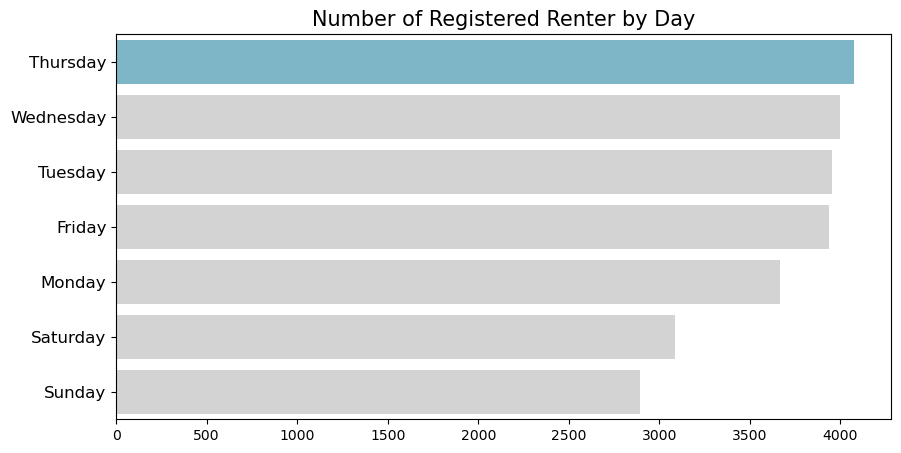

In [68]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="registered", 
    y="day",
    data=everyday_df.sort_values(by="registered", ascending=False),
    palette=colors_
)
plt.title("Number of Registered Renter by Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana Pola / Ciri Khas dari Rata-Rata Penyewa Sepeda untuk Masing-Masing Season ?

In [69]:
season_df = day_df.groupby("season").agg({
    "casual": "mean", 
    "registered": "mean",
    "cnt": "mean", 
}).round(0)
season_df

,casual,registered,cnt
season,,,
1,335.0,2269.0,2604.0
2,1106.0,3886.0,4992.0
3,1203.0,4442.0,5644.0
4,729.0,3999.0,4728.0


In [70]:
season_df = season_df.reset_index()
season_df.rename(columns={
    "cnt": "total",
}, inplace=True)
season_df

,season,casual,registered,total
0,1,335.0,2269.0,2604.0
1,2,1106.0,3886.0,4992.0
2,3,1203.0,4442.0,5644.0
3,4,729.0,3999.0,4728.0


In [72]:
 season_dict = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter",
    }

In [73]:
season_df["season"] = season_df["season"].replace(season_dict)


In [74]:
season_df

,season,casual,registered,total
0,Spring,335.0,2269.0,2604.0
1,Summer,1106.0,3886.0,4992.0
2,Fall,1203.0,4442.0,5644.0
3,Winter,729.0,3999.0,4728.0


In [75]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      4 non-null      category
 1   casual      4 non-null      float64 
 2   registered  4 non-null      float64 
 3   total       4 non-null      float64 
dtypes: category(1), float64(3)
memory usage: 432.0 bytes


In [76]:
season_df['season']=season_df['season'].astype(str)

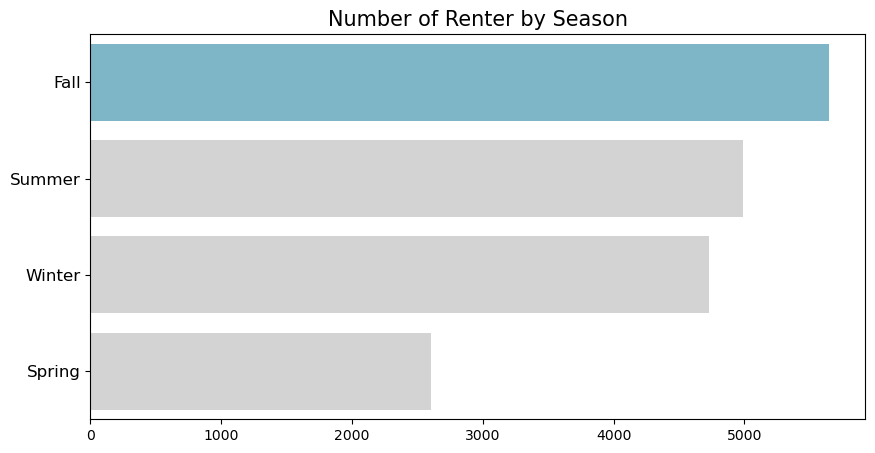

In [77]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="total", 
    y="season",
    data=season_df.sort_values(by="total", ascending=False),
    palette=colors_
)
plt.title("Number of Renter by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

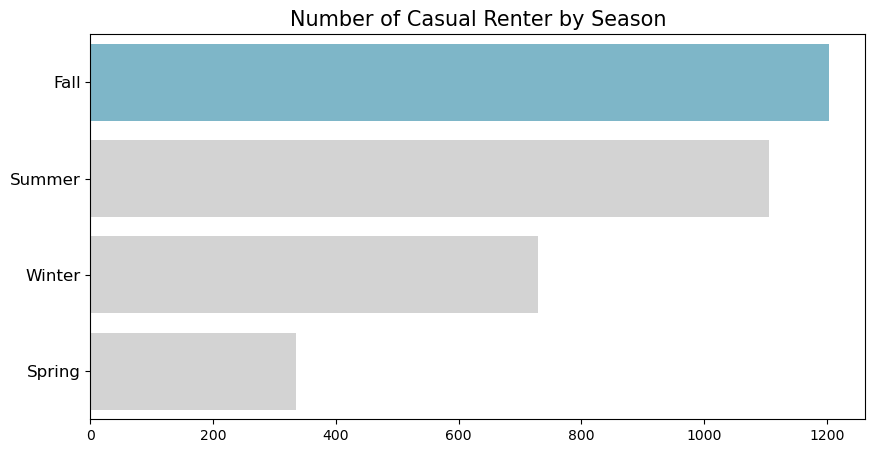

In [78]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="casual", 
    y="season",
    data=season_df.sort_values(by="casual", ascending=False),
    palette=colors_
)
plt.title("Number of Casual Renter by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

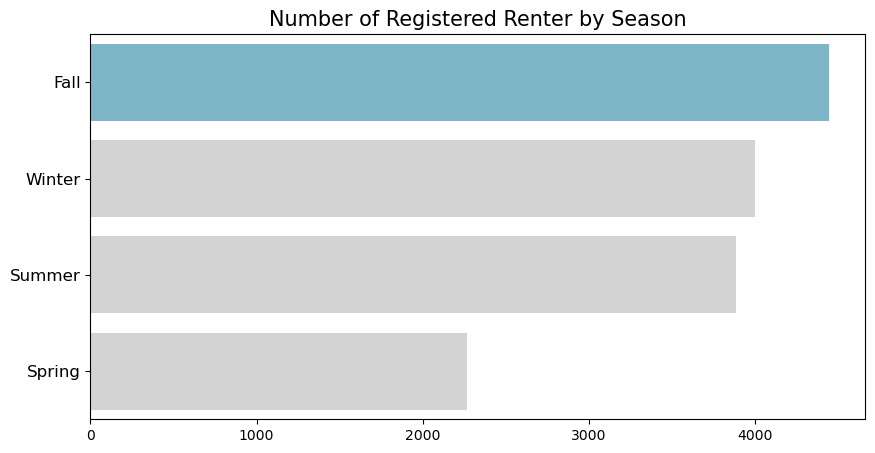

In [79]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="registered", 
    y="season",
    data=season_df.sort_values(by="registered", ascending=False),
    palette=colors_
)
plt.title("Number of Registered Renter by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
*  Peak terendah ada pada Awal tahun 2012, banyak hal yang dapat mempengaruhi performa penyewaan sepeda, namun jika kita melihat secara sudut pandang tahunan yang dimana kita melihat trending performa setiap bulan, maka hal yang paling mencolok based on data adalah pengaruh musim dan weathersit. Sisanya dijelaskan diluar data yang didapat. Trending cenderung naik dan sangat tinggi di pertengahan tahun dan turun di akhir tahun. namun di akhir tahun, trend tidak sampai jatuh dibawah awal tahun, seharusnya hal ini akan naik kembali apabila perusahaan bekerja keras dan mencari strategi yang efektif untuk mempertahankan sekaligus meningkatkan performa perusahaan bahkan jika kita lihat pada saat EDA, tahun demi tahun perusahaan dapat mengalami kenaikan performa.
- Conclution pertanyaan 2 :
* Rata-rata penyewa sepeda yang paling tinggi di pegang oleh hari jumat, namun apabila kita gali lebih dalam, sebenarnya untuk casual renter atau peminjam spontan / peminjam non-member, cenderung tinggi pada hari sabtu, hal ini bisa diartikan dipengaruhi oleh weekday, dan banyak orang baru atau orang yang spontan saja menyewa sepeda tanpa berlangganan karena memang mereka menyewa hanya untuk vacation, berlibur, dan tidak ada rencana untuk memperpanjang sewa. Sedangkan untuk Registered Renter atau penyewa yang sudah merupakan member dari perusahaan, cenderung rata-rata terbanyak meminjam di hari kamis, hal ini sulit saya jelaskan karena kurangnya informasi yang diberikan.
- Conclution pertanyaan 3 :
* Rata-rata penyewa sepeda yang paling tinggi baik untuk casual user, registered user, maupun keseluruhan dipegang oleh Fall Season. Karena kurangnya informasi, seperti latar tempat dari data yang diambil maka pendapat saya adalah karena Musim gugur identik dengan udara yang lebih segar dan bersih dibandingkan musim panas. Pada musim gugur juga memiliki udara yang sejuk dan bebas polusi membuat bersepeda lebih menyehatkan dan menyenangkan.